In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Data Sets

In [3]:
aisles = pd.read_csv("/Users/shivanireddy/Downloads/archive/aisles.csv")
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
departments=pd.read_csv("/Users/shivanireddy/Downloads/archive/departments.csv")
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [5]:
orders=pd.read_csv("/Users/shivanireddy/Downloads/archive/orders.csv")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [6]:
products=pd.read_csv("/Users/shivanireddy/Downloads/archive/products.csv")
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
#Extracting the Organic Products

In [10]:
organic = products['product_name'].str.contains('Organic')
products['is_organic'] = organic

In [11]:
products.head()

,product_id,product_name,aisle_id,department_id,is_organic
0,1,Chocolate Sandwich Cookies,61,19,False
1,2,All-Seasons Salt,104,13,False
2,3,Robust Golden Unsweetened Oolong Tea,94,7,False
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,False
4,5,Green Chile Anytime Sauce,5,13,False


In [12]:
order_products_prior=pd.read_csv("/Users/shivanireddy/Downloads/archive/order_products__prior.csv")
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [13]:
order_products_prior.count()

order_id             32434489
product_id           32434489
add_to_cart_order    32434489
reordered            32434489
dtype: int64

In [14]:
order_products_train=pd.read_csv("/Users/shivanireddy/Downloads/archive/order_products__train.csv")
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [15]:
# Concatenating the Prior and Train Datasets 

In [16]:
df = pd.concat([order_products_prior,order_products_train],axis = 0)

In [17]:
df

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [18]:
df.count()

order_id             33819106
product_id           33819106
add_to_cart_order    33819106
reordered            33819106
dtype: int64

In [19]:
## To understand the types of values in the orders dataset
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [22]:
### Since the evaluation set column has three values, and we have the prior and train datasets, we will consider only those two values from the evaluation set column.

In [23]:
# Merging the datasets

In [24]:
df_new = df.merge(products, how = 'inner', on = 'product_id')

In [25]:
df_new.count()

order_id             33819106
product_id           33819106
add_to_cart_order    33819106
reordered            33819106
product_name         33819106
aisle_id             33819106
department_id        33819106
is_organic           33819106
dtype: int64

In [26]:
df_new.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
aisle_id             0
department_id        0
is_organic           0
dtype: int64

In [27]:
df_new[df_new['order_id']==3421070]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic
4595800,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,True
10808227,3421070,16953,2,1,Creamy Peanut Butter,88,13,False
19831040,3421070,4724,3,1,Broccoli Florettes,32,4,False


In [28]:
df_new[df_new['product_name']=='Biotin 1000 mcg']

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic
33289766,57903,42,21,0,Biotin 1000 mcg,47,11,False
33289767,177189,42,4,0,Biotin 1000 mcg,47,11,False
33289768,292672,42,5,0,Biotin 1000 mcg,47,11,False
33289769,611135,42,7,1,Biotin 1000 mcg,47,11,False
33289770,735753,42,1,0,Biotin 1000 mcg,47,11,False
33289771,886885,42,1,0,Biotin 1000 mcg,47,11,False
33289772,1011195,42,7,0,Biotin 1000 mcg,47,11,False
33289773,1140376,42,2,0,Biotin 1000 mcg,47,11,False
33289774,1517003,42,56,0,Biotin 1000 mcg,47,11,False
33289775,1975795,42,6,0,Biotin 1000 mcg,47,11,False


In [30]:
df_new=df_new.merge(aisles, on = 'aisle_id')

In [31]:
df_new.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic,aisle_x,aisle_y
0,2,33120,1,1,Organic Egg Whites,86,16,True,eggs,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,True,eggs,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,True,eggs,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,True,eggs,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,True,eggs,eggs


In [32]:
df_new=df_new.merge(departments, on = 'department_id')

In [33]:
df_new.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic,aisle_x,aisle_y,department
0,2,33120,1,1,Organic Egg Whites,86,16,True,eggs,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,True,eggs,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,True,eggs,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,True,eggs,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,True,eggs,eggs,dairy eggs


In [34]:
df_new=df_new.merge(orders, on = 'order_id')

In [35]:
df_new.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic,aisle_x,aisle_y,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,True,eggs,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,True,fresh vegetables,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,17794,6,1,Carrots,83,4,False,fresh vegetables,fresh vegetables,produce,202279,prior,3,5,9,8.0
3,2,43668,9,0,Classic Blend Cole Slaw,123,4,False,packaged vegetables fruits,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0
4,2,9327,3,0,Garlic Powder,104,13,False,spices seasonings,spices seasonings,pantry,202279,prior,3,5,9,8.0


In [36]:
df_new['user_id'].max()

206209

In [37]:
df_new['eval_set'].value_counts()

prior    32434489
train     1384617
Name: eval_set, dtype: int64

In [38]:
df_new.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'is_organic', 'aisle_x',
       'aisle_y', 'department', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [39]:
df_new.shape

(33819106, 17)

In [40]:
df_new.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
is_organic                      0
aisle_x                         0
aisle_y                         0
department                      0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [41]:
df_new.dtypes

order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
is_organic                   bool
aisle_x                    object
aisle_y                    object
department                 object
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [42]:
## After conducting the preceding study, a CSV file for groceries has been created.

In [46]:
df_new.to_csv("/Users/shivanireddy/Downloads/archive/groceries.csv", index=False)

In [50]:
df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [51]:
#From groceries.csv, the final dataframe was created with the necessary columns.
all_orders = df_new[['user_id','order_id','product_id','product_name','department_id','department','add_to_cart_order']]

In [54]:
#We have examined how many orders a user has placed based on user ID.
all_orders[all_orders['user_id']==125093]

,user_id,order_id,product_id,product_name,department_id,department,add_to_cart_order
20481231,125093,418920,27845,Organic Whole Milk,16,dairy eggs,3
20481232,125093,418920,13249,Skim Milk,16,dairy eggs,1
20481233,125093,418920,37973,Apricot-Raspberry Preserves,13,pantry,5
20481234,125093,418920,23594,Medium Salsa,13,pantry,4
20481235,125093,418920,10603,93% Ground Beef,12,meat seafood,2
20481236,125093,418920,34050,Orange Juice,7,beverages,6
20485176,125093,440736,27845,Organic Whole Milk,16,dairy eggs,1
20485177,125093,440736,117,Petit Suisse Fruit,16,dairy eggs,2
20485178,125093,440736,10603,93% Ground Beef,12,meat seafood,4
20485179,125093,440736,28597,Organic Stoneground Wheat Crackers,19,snacks,5


In [56]:
all_orders

,user_id,order_id,product_id,product_name,department_id,department,add_to_cart_order
0,202279,2,33120,Organic Egg Whites,16,dairy eggs,1
1,202279,2,28985,Michigan Organic Kale,4,produce,2
2,202279,2,17794,Carrots,4,produce,6
3,202279,2,43668,Classic Blend Cole Slaw,4,produce,9
4,202279,2,9327,Garlic Powder,13,pantry,3
...,...,...,...,...,...,...,...
33819101,27208,1015358,46477,100% Pure Peppermint Oil,2,other,1
33819102,17880,647259,36631,Soothing Relief Diaper Rash Cream,2,other,1
33819103,62266,2010951,16161,SystemSupport Liver Cleanse Capsules,2,other,1
33819104,69235,2684414,1013,Poly-Vi-Sol® Infants And Toddlers Multivitamin...,2,other,1


In [57]:
### From the above data I have gathered few details like:
#### how many customers in the data?

#### how many orders placed?

#### how many aisles involved?

#### how many products ordered?

In [58]:
#simple description of the data.
print(str(len(all_orders.user_id.unique())) +' customers')
print(str(len(all_orders.order_id.unique())) +' orders')
print(str(len(all_orders.product_id.unique())) +' products')

206209 customers
3346083 orders
49685 products


In [59]:
all_orders.groupby('user_id')['order_id'].nunique().describe()

count    206209.000000
mean         16.226658
std          16.662238
min           3.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

In [60]:
df_new.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'is_organic', 'aisle_x',
       'aisle_y', 'department', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [61]:
# Effects of time on purchase decisions
## How does time impact how customers behave while making purchases?
#### The majority of orders are placed on Days 0 and 1.
#### Most orders are placed between the hours of 9:00 AM and 4:00 PM.
#### Saturday afternoon (1:00 PM) and Sunday morning are the busiest times for orders (10:00AM)
#### People often purchase previously purchased goods between 6:00AM and 8:00AM by more than 65%.
#### Most consumers place orders seven days following their previous purchase. or within a month after their most recent purchase.
#### The likelihood of placing another order within the same month is low when a week has passed since the last one.
#### To catch the high likelihood that a client will place their next order, send reminders of the goods that were most likely ordered within a week.
#### The probability that the subsequent order will be placed within ten days of the present order is greater.
#### Which day of the week receives the most orders?
#### According to the graph below, Sunday appears to be the day on which most orders are placed. As people stock up for the week, this is to be anticipated. The day with the most orders is Monday.

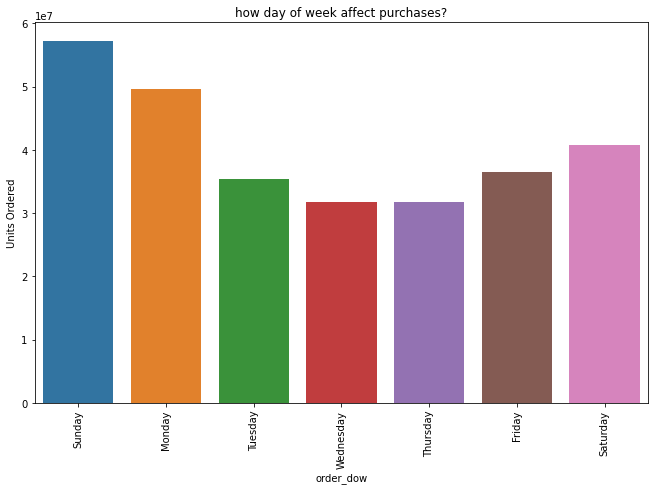

In [62]:
plt.figure(figsize=(11,7))
ticks={'0':'Sunday','1':'Monday','2':'Tuesday','3':'Wednesday','4':'Thursday','5':'Friday','6':'Saturday'}
x = sns.barplot(data = df_new.groupby('order_dow')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:30], x = 'order_dow', y = 'add_to_cart_order')
x.set_xticklabels(ticks.values(), rotation = 90)
x.set_title('how day of week affect purchases?')
x.set(xlabel = 'order_dow', ylabel = 'Units Ordered')
plt.show()

In [64]:
# Which time of the day receives the most orders?
## The majority of orders, as seen here, are placed between the hours of 10 am and 4 pm. It is anticipated that more orders will be placed during the day.

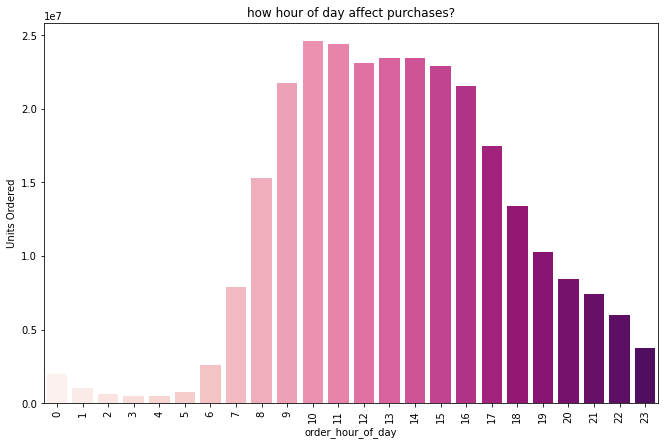

In [65]:
plt.figure(figsize=(11,7))
x = sns.barplot(data = df_new.groupby('order_hour_of_day')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:30], x = 'order_hour_of_day', y = 'add_to_cart_order',palette='RdPu')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set_title('how hour of day affect purchases?')
x.set(xlabel = 'order_hour_of_day', ylabel = 'Units Ordered')
plt.show()

In [66]:
# How frequently do individuals order groceries?
## The days since the previous order information can be used to infer this. Most customers appear to have placed their orders before the 7 and 30 day mark. As consumers often stock up weekly or monthly, this is also expected.

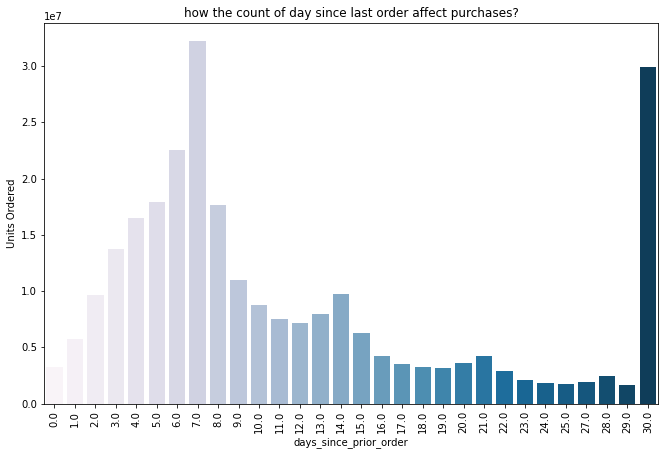

In [68]:
plt.figure(figsize=(11,7))
x = sns.barplot(data = df_new.groupby('days_since_prior_order')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:30], x = 'days_since_prior_order', y = 'add_to_cart_order',palette='PuBu')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set_title('how the count of day since last order affect purchases?')
x.set(xlabel = 'days_since_prior_order', ylabel = 'Units Ordered')
plt.show()

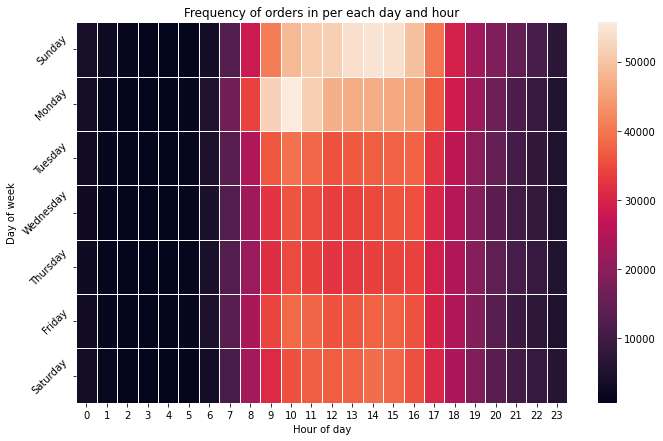

In [69]:
#Plotting the heat map of orders in per day
ticks={'0':'Sunday','1':'Monday','2':'Tuesday','3':'Wednesday','4':'Thursday','5':'Friday','6':'Saturday'}
groupeddf = orders.groupby(['order_dow', 'order_hour_of_day'])['order_id'].agg('count').reset_index().rename(columns={'order_id':'orders_count'})
heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'orders_count')

plt.figure(figsize=(11,7))
ax = sns.heatmap(data=heatmap_data, cmap="rocket", linewidths=.5)
ax.set_yticklabels(ticks.values(), rotation = 45)
plt.title('Frequency of orders in per each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

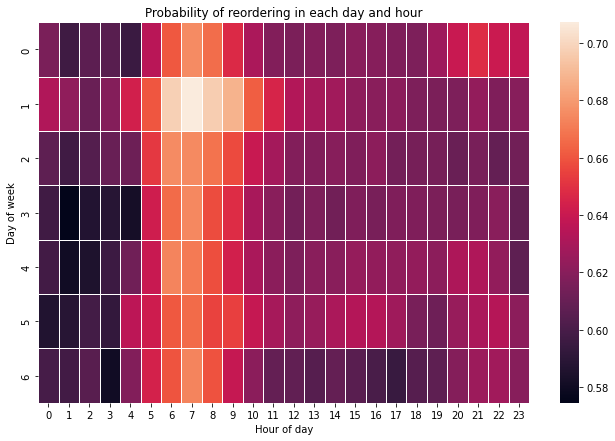

In [70]:
#Graph for heatmap of reording in each day and hour
non_first_orders = df_new['order_number'] != 1
groupeddf = df_new[non_first_orders].groupby(['order_dow', 'order_hour_of_day']).agg({'reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio'})
heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'reordered_ratio')
plt.figure(figsize=(11,7))
ax = sns.heatmap(data=heatmap_data, cmap="rocket", linewidths=.5)
plt.title('Probability of reordering in each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

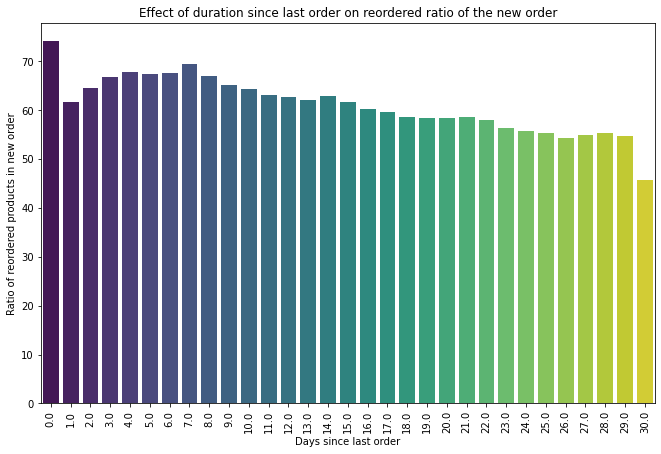

In [71]:
#Bar plot for the ratio on last reordered to new order 
plt.figure(figsize=(11,7))
groupeddf = df_new.groupby(['days_since_prior_order']).agg({'reordered': 'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
sns.barplot(x=groupeddf['days_since_prior_order'], y=groupeddf['reordered_ratio']*100,  palette='viridis')
plt.ylabel('Ratio of reordered products in new order')
plt.xlabel('Days since last order')
plt.xticks(rotation=90)
plt.title('Effect of duration since last order on reordered ratio of the new order')
plt.show()

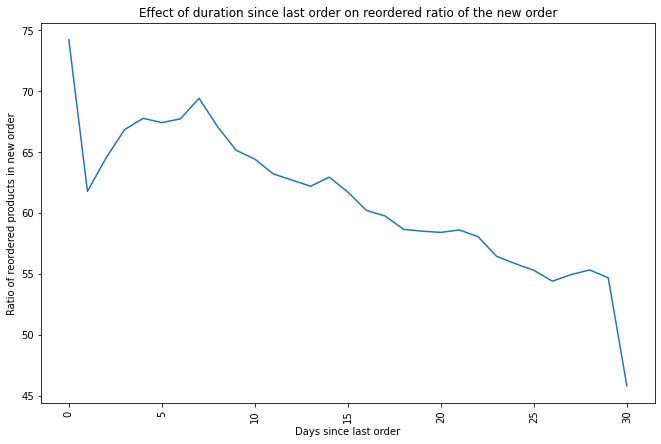

In [72]:
plt.figure(figsize=(11,7))
groupeddf = df_new.groupby(['days_since_prior_order']).agg({'reordered': 'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
sns.lineplot(x=groupeddf['days_since_prior_order'], y=groupeddf['reordered_ratio']*100)
plt.ylabel('Ratio of reordered products in new order')
plt.xlabel('Days since last order')
plt.xticks(rotation=90)
plt.title('Effect of duration since last order on reordered ratio of the new order')
plt.show()

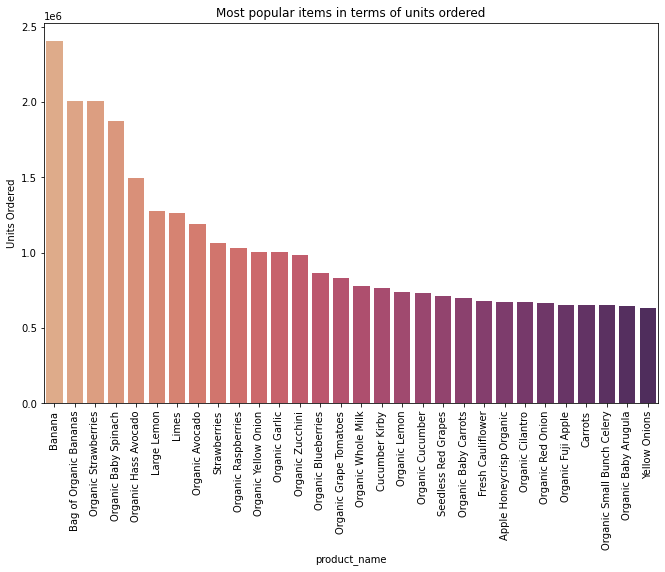

In [73]:
#Popular items ordered 
plt.figure(figsize=(11,7))
x = sns.barplot(data = df_new.groupby('product_name')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:30], x = 'product_name', y = 'add_to_cart_order', palette='flare')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)

x.set(xlabel = 'product_name', ylabel = 'Units Ordered')
plt.title('Most popular items in terms of units ordered')
plt.show()

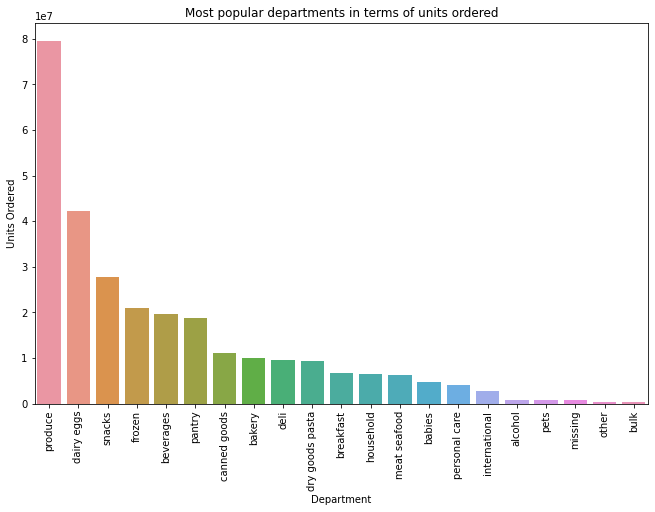

In [74]:
#Popular departments
plt.figure(figsize=(11,7))
x = sns.barplot(data = df_new.groupby('department')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:30], x = 'department', y = 'add_to_cart_order')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Department', ylabel = 'Units Ordered')
plt.title("Most popular departments in terms of units ordered")
plt.show()

<Figure size 792x504 with 0 Axes>

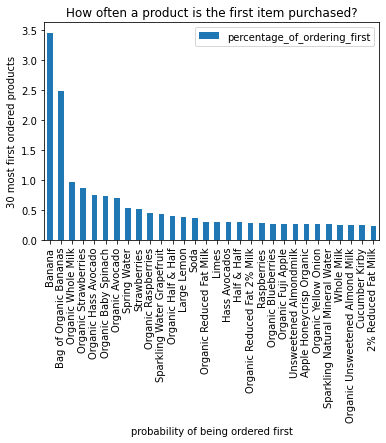

In [76]:
# Sorting Products by the count of times they appeared first in cart.

total_orders= len(all_orders.order_id.unique())

first_order_product = all_orders[all_orders['add_to_cart_order'] == 1]
first_product_freq_desc = first_order_product.groupby(['product_name'], as_index = False)['order_id'].count().sort_values(by=['order_id'], ascending=False)
first_product_freq_desc['count_of_ordering_first'] = first_product_freq_desc['order_id']

# Ploting the Percentage of being ordered first for the 30 most first ordered products.

first_product_freq_desc['percentage_of_ordering_first'] = (first_product_freq_desc['count_of_ordering_first']/total_orders) * 100
plt.figure(figsize=(11,7))
first_product_freq_desc.iloc[:30].plot.bar(x='product_name', y='percentage_of_ordering_first')
plt.ylabel('30 most first ordered products')
plt.xlabel('probability of being ordered first')
plt.xticks(rotation=90)
plt.title('How often a product is the first item purchased?')
plt.show()

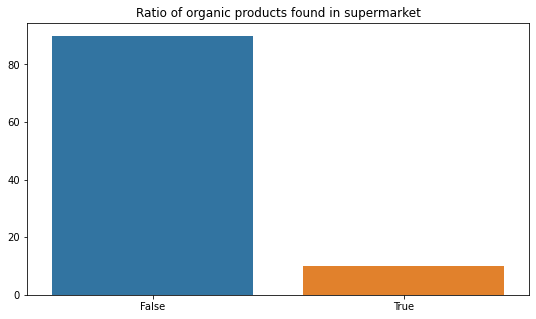

In [77]:
#Organinc products
total_products_count = products.shape[0]
organic_ratio = products['is_organic'].value_counts()/total_products_count*100
plt.figure(figsize=(9,5))
ax = sns.barplot(x= organic_ratio.index, y=organic_ratio.values)
plt.title('Ratio of organic products found in supermarket')
plt.show()

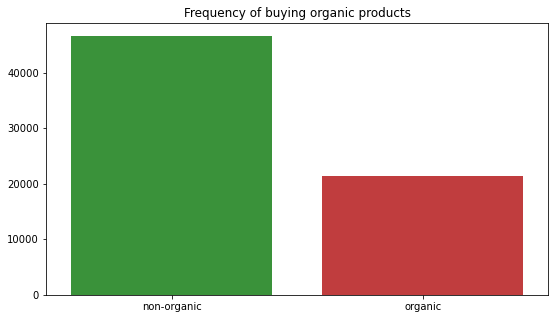

In [78]:
#Purchase of orgainc products
total_order_products_count = products.shape[0]
organic_freq = df_new['is_organic'].value_counts()/total_order_products_count*100
plt.figure(figsize=(9,5))
ax = sns.barplot(x= organic_freq.index, y=organic_freq.values, palette = ['tab:green','tab:red'])
ax.set_xticklabels(['non-organic', 'organic'])
plt.title('Frequency of buying organic products')
plt.show()

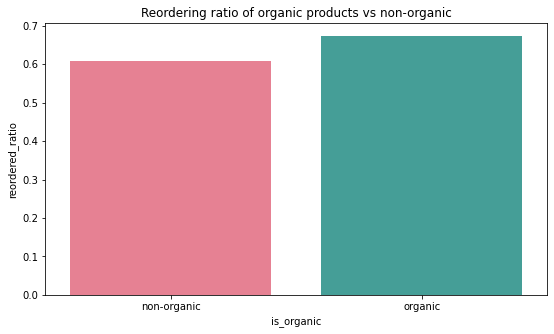

In [79]:
#Re-purchase of organic vs non-organic products
non_first_orders_mask = df_new['order_number'] != 1
groupeddf = df_new[non_first_orders_mask].groupby(['is_organic']).agg({'reordered':'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
plt.figure(figsize=(9,5))
ax = sns.barplot(x='is_organic', y='reordered_ratio', data=groupeddf, palette = 'husl')
ax.set_xticklabels(['non-organic', 'organic'])
plt.title('Reordering ratio of organic products vs non-organic')
plt.show()

In [83]:
# Using groupBy for both department and order_hour_of_day 
df_new.groupby(["department", "order_hour_of_day"])['department_id'].count().sort_values(ascending=False)

department  order_hour_of_day
produce     10                   832676
            11                   829503
            14                   821799
            13                   813308
            15                   811559
                                  ...  
other       3                        72
bulk        2                        69
other       4                        66
bulk        3                        50
            4                        47
Name: department_id, Length: 504, dtype: int64

In [84]:
df_new.groupby("product_name")['product_id'].count().sort_values(ascending=False)

product_name
Banana                                           491291
Bag of Organic Bananas                           394930
Organic Strawberries                             275577
Organic Baby Spinach                             251705
Organic Hass Avocado                             220877
                                                  ...  
Greek Blended Cherry Fat Free Yogurt                  1
All Natural Stevia Liquid Extract Sweetener           1
Frittata, Farmer's Market                             1
Max White With Polishing Star Soft Toothbrush         1
Orange Recharge                                       1
Name: product_id, Length: 49685, dtype: int64

In [85]:
add2cart_1=df_new[df_new['add_to_cart_order']==1]
add2cart_1.groupby("product_name")['product_id'].count().sort_values(ascending=False)

product_name
Banana                                                115521
Bag of Organic Bananas                                 82877
Organic Whole Milk                                     32071
Organic Strawberries                                   28875
Organic Hass Avocado                                   24913
                                                       ...  
Prime Cuts Svory Beef Dog Food                             1
Lucky Charms Marshmallow Flavor Treats                     1
Complete Skillet Meal For Two Beef & Broccoli              1
Complete Sensitive All Day Moisturizer With SPF 15         1
Artichoke Hearts In Water                                  1
Name: product_id, Length: 42188, dtype: int64

In [86]:
add2cart_2=df_new[df_new['add_to_cart_order']==2]
add2cart_2.groupby("product_name")['product_id'].count().sort_values(ascending=False)

product_name
Banana                                                83631
Bag of Organic Bananas                                67204
Organic Strawberries                                  30836
Organic Hass Avocado                                  27442
Organic Baby Spinach                                  26071
                                                      ...  
Farmland Hickory Smoked Bacon 24oz                        1
Sugar Free Orange Marmalade                               1
Farmhouse Reserve Aged Cheddar Cheese                     1
Farmer’s Market Vine Ripened Tomato & Basil Hummus        1
Crunchy Almond Unsalted Butter                            1
Name: product_id, Length: 42003, dtype: int64

In [87]:
add2cart_3=df_new[df_new['add_to_cart_order']==3]
add2cart_3.groupby("product_name")['product_id'].count().sort_values(ascending=False)

product_name
Banana                                                                    60832
Bag of Organic Bananas                                                    50923
Organic Strawberries                                                      28908
Organic Baby Spinach                                                      25346
Organic Hass Avocado                                                      25029
                                                                          ...  
Soup Mix, Split Pea, with Seasonings                                          1
Air Effects UNstopables Fresh Air Freshener (1 Count, 9.7 oz) Air Care        1
Keurig House Blend Extra Bold Medium Roast Coffee K Cups                      1
Sore Throat, Sprayer, Menthol                                                 1
Mixations Pineapple Pouch Apple                                               1
Name: product_id, Length: 41963, dtype: int64

In [88]:
# summary of number of orders by user

df_new.groupby('user_id')['order_id'].nunique().describe()

count    206209.000000
mean         16.226658
std          16.662238
min           3.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

[Text(0.5, 0, 'Orders/User')]

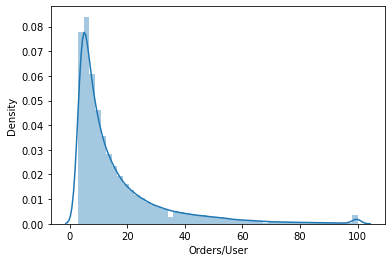

In [89]:
# distribution plot of orders/user

x = sns.distplot(df_new.groupby('user_id')['order_id'].nunique())
x.set(xlabel = 'Orders/User')

In [90]:
# summary of units ordered/customer over the year

df_new.groupby('user_id')['add_to_cart_order'].sum().describe()

count    206209.000000
mean       1372.342643
std        2489.390476
min           3.000000
25%         203.000000
50%         568.000000
75%        1483.000000
max      138990.000000
Name: add_to_cart_order, dtype: float64

[Text(0.5, 0, 'Units Ordered/User')]

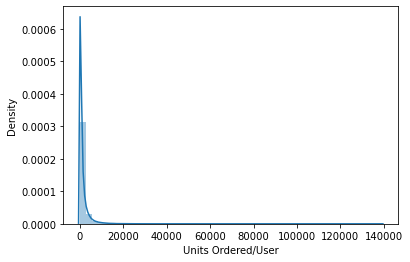

In [91]:
# distplot of number of units ordered/customer ordered over the year

x = sns.distplot(df_new.groupby('user_id')['add_to_cart_order'].sum())
x.set(xlabel = 'Units Ordered/User')

In [92]:
# summary of order size

df_new.groupby('order_id')['add_to_cart_order'].sum().describe()

count    3.346083e+06
mean     8.457334e+01
std      1.355298e+02
min      1.000000e+00
25%      1.500000e+01
50%      3.600000e+01
75%      1.050000e+02
max      1.058500e+04
Name: add_to_cart_order, dtype: float64

[Text(0.5, 0, 'Units/Order')]

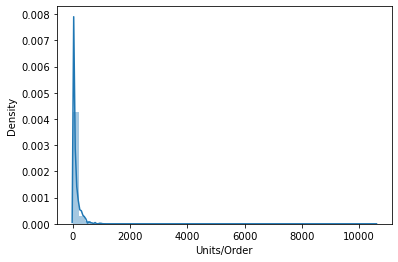

In [93]:
# distplot of number of units/order

x = sns.distplot(df_new.groupby('order_id')['add_to_cart_order'].sum())
x.set(xlabel = 'Units/Order')

[Text(0.5, 0, 'Units/Order')]

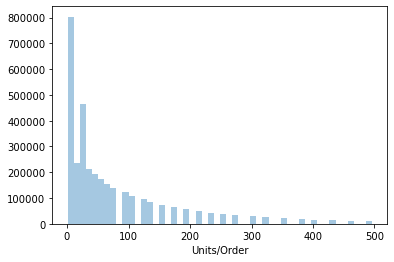

In [94]:
# cutoff previous distplot 500 units

order_size = df_new.groupby('order_id')['add_to_cart_order'].sum().reset_index()

x = sns.distplot(order_size[order_size['add_to_cart_order'] < 500]['add_to_cart_order'], kde = False)
x.set(xlabel = 'Units/Order')

In [95]:
# summary statistics for average time between orders by user

orders.groupby('user_id')['days_since_prior_order'].mean().describe()

count    206209.000000
mean         15.448686
std           6.915575
min           0.000000
25%           9.814815
50%          15.000000
75%          20.625000
max          30.000000
Name: days_since_prior_order, dtype: float64

[Text(0.5, 0, 'Average Days Between Orders By User')]

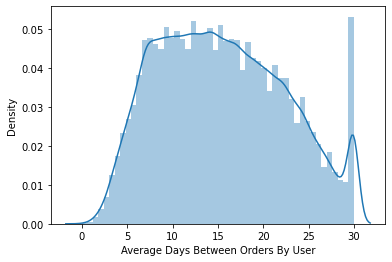

In [96]:
# distplot for time between orders

x = sns.distplot(orders.groupby('user_id')['days_since_prior_order'].mean())
x.set(xlabel = 'Average Days Between Orders By User')

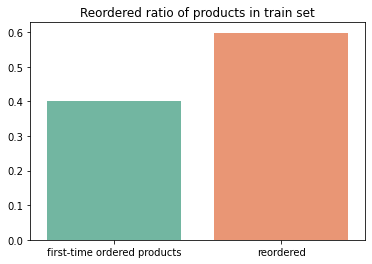

In [97]:
#Repurchase of items accoridng to the train set
total_prod_count = order_products_train.shape[0]
reorder_ratio = order_products_train['reordered'].value_counts()/total_prod_count
ax = sns.barplot(x=reorder_ratio.index, y=reorder_ratio.values, palette = 'Set2')
ax.set_xticklabels(['first-time ordered products', 'reordered'])
plt.title('Reordered ratio of products in train set')
plt.show()